## Indusry Movies

In this project I want to analyse what happened in the Movie industry between 1980 - 2020
I use a kaggle datset and you can find it on: 

There are some columns in this Data Frame and this content is related to: https://www.kaggle.com/datasets/danielgrijalvas/movies

### Content
There are 6820 movies in the dataset (220 movies per year, 1980-2020). Each movie has the following attributes:

budget: the budget of a movie. Some movies don't have this, so it appears as 0

company: the production company

country: country of origin

director: the director

genre: main genre of the movie.

gross: revenue of the movie

name: name of the movie

rating: rating of the movie (R, PG, etc.)

released: release date (YYYY-MM-DD)

runtime: duration of the movie

score: IMDb user rating

votes: number of user votes

star: main actor/actress

writer: writer of the movie

year: year of release

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
#lets see missing vlaues
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
#lets based on precentage
Precent_nulls = (df.isnull().sum() / len(df))*100
Precent_nulls

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

As you see we cannot drop all null values, because they are around 30% of all values (in budgets) so we keep going to find a better and new soloution. :)

In [9]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [10]:
percent_nan = percent_missing(df)

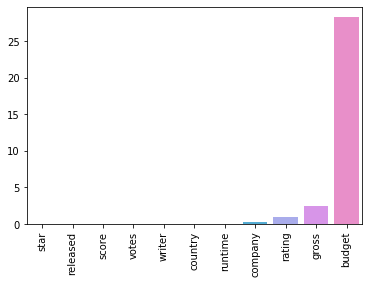

In [11]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

(0, 1)

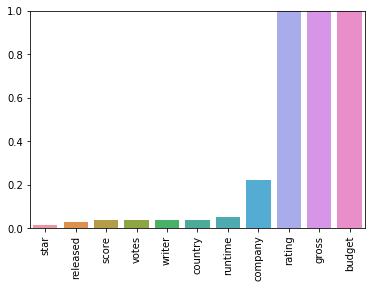

In [12]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

In [13]:
# Find lower than 1% missing values
percent_nan[percent_nan < 1]

star        0.013041
released    0.026082
score       0.039124
votes       0.039124
writer      0.039124
country     0.039124
runtime     0.052165
company     0.221701
dtype: float64

In [14]:
100/len(df)

0.013041210224308816

In [15]:
0.013041*2

0.026082

As you see Missing values in stars = 1,
                             released = 2,
                             score, votes, writer, country = 3,
                             runtime = 5,
                             company is almost ~ 17,
                             
These data is for refresh and we saw them above.

In [16]:
df[df['star'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
474,The Business of Show Business,NaN,History,1983,"February 15, 1983 (Canada)",8.3,79.0,Tom Logan,Tom Logan,NaN,Canada,323562.0,NaN,CTV,55.0


In [17]:
df[df['released'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [18]:
df[df['score'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [19]:
df[df['writer'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1820,The Garden,Unrated,Drama,1990,1990 (United States),6.4,840.0,Derek Jarman,NaN,Tilda Swinton,United Kingdom,NaN,5006.0,Basilisk Communications,92.0
5834,The Trip,Not Rated,Comedy,2010,"April 24, 2011 (Greece)",7.0,22000.0,Michael Winterbottom,NaN,Steve Coogan,United Kingdom,NaN,3945217.0,Baby Cow Productions,112.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0


In [20]:
df[df['country'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN
7615,Clinton Road,NaN,Horror,2019,"June 14, 2019 (United States)",5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [21]:
df[df['runtime'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN
6195,One for the Money,PG-13,Action,2012,"January 27, 2012 (United States)",5.3,41000.0,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000.0,38084162.0,Lakeshore Entertainment,NaN
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN


#### As you see, we have sharing movies in this section. I want to complete numeric values with '0', and fill object (str) values with 'None'.

In [22]:
Numeric_Cols =  ['score', 'runtime', 'votes', 'released']
df[Numeric_Cols] = df[Numeric_Cols].fillna(0)

'released' put in the Numeric columns, because I want to change this datatype to numeric in continue.

In [23]:
Str_Cols = ['star', 'writer', 'country']
df[Str_Cols] = df[Str_Cols].fillna('None')

In [24]:
df[df['company'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
408,A Night in Heaven,R,Drama,1983,"November 18, 1983 (United States)",4.3,1200.0,John G. Avildsen,Joan Tewkesbury,Christopher Atkins,United States,NaN,5563663.0,NaN,83.0
464,White Star,NaN,Drama,1983,"March 8, 1985 (West Germany)",6.0,235.0,Roland Klick,Karen Jaehne-Lathan,Dennis Hopper,West Germany,100000.0,NaN,NaN,92.0
469,Last Plane Out,PG,Action,1983,"September 23, 1983 (United States)",4.5,131.0,David Nelson,Ernest Tidyman,Jan-Michael Vincent,United States,NaN,NaN,NaN,92.0
633,The Bear,PG,Biography,1984,"September 28, 1984 (United States)",6.1,270.0,Richard C. Sarafian,Michael Kane,Gary Busey,United States,221000.0,2687148.0,NaN,110.0
969,Modern Girls,PG-13,Comedy,1986,"November 7, 1986 (United States)",5.8,1300.0,Jerry Kramer,Laurie Craig,Daphne Zuniga,United States,NaN,604849.0,NaN,84.0
1033,P.O.W. the Escape,R,Action,1986,"April 4, 1986 (United States)",5.0,533.0,Gideon Amir,Malcolm Barbour,David Carradine,United States,NaN,2497233.0,NaN,90.0
1572,Heart of Dixie,PG,Drama,1989,"August 25, 1989 (United States)",5.2,677.0,Martin Davidson,Anne Rivers Siddons,Ally Sheedy,United States,8000000.0,1097333.0,NaN,95.0
1594,Lost Angels,R,Drama,1989,"May 5, 1989 (United States)",6.0,881.0,Hugh Hudson,Michael Weller,Donald Sutherland,United States,NaN,1247946.0,NaN,116.0
1630,Staying Together,R,Comedy,1989,"November 10, 1989 (United States)",6.2,761.0,Lee Grant,Monte Merrick,Sean Astin,United States,NaN,4348025.0,NaN,91.0
1806,Streets,R,Action,1990,"January 19, 1990 (United States)",5.7,712.0,Katt Shea,Andy Ruben,Christina Applegate,United States,NaN,1510053.0,NaN,85.0


In [25]:
df['company'] = df['company'].fillna('None')

In [26]:
df[df['company'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [27]:
# Check the precentage missing data 
percent_nan = percent_missing(df)

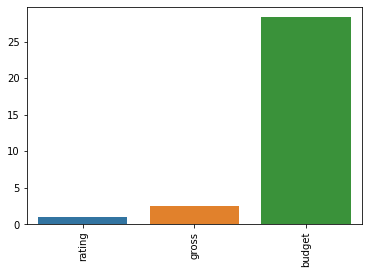

In [28]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [29]:
percent_nan[percent_nan < 100]

rating     1.004173
gross      2.464789
budget    28.312467
dtype: float64

As you See, we filled missing values with less than 1%. 
in this step if we have data with high precentage of missing values we should remove these columns.
But in this dataset we have around 30% in the highest amount.
I will try to find best values for this missing values.

We knows that the number of missing values is:

rating  =      77

budget   =   2171

gross   =     189


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [31]:
df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
TV-14           1
Approved        1
Name: rating, dtype: int64

Rating is an object values (str) and we cannot fill with numerical methods, then we could fill them by 'None'.

In [32]:
df['rating'] = df['rating'].fillna('None')

In [33]:
df[df['rating'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In the next step we going to gross and budget columns.
They are numeric data and we can use the computential method for filling the NaN values.
I choose the mean value because it's a logical method. :)

In [34]:
# Check the precentage missing data 
percent_nan = percent_missing(df)

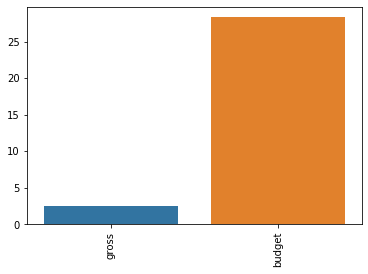

In [35]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

For filling vlaues with mean we have 2 common method:

1- Use the mean exactly 

2- Use the imputation method (it's more accurate), this method is say that we can fill the missing values based on the most related columns togather, So we need to find the highest corroleation between columns 'budget' and 'groos'.

If you dont know about this method, read this page: https://en.wikipedia.org/wiki/Imputation_(statistics)

In [36]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.329321,0.257486,0.116358
score,0.092616,1.000000,0.407101,0.078375,0.186258,0.394564
votes,0.222427,0.407101,1.000000,0.442583,0.630757,0.306984
budget,0.329321,0.078375,0.442583,1.000000,0.740395,0.319190
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.244854
runtime,0.116358,0.394564,0.306984,0.319190,0.244854,1.000000


As we see the budget and gross are very related togather, then we cannot use them for imputation method.
As a result, we use the mean (method 1) for cleaning process.

In [37]:
df['gross'].fillna(df['gross'].mean(), inplace = True)
df['budget'].fillna(df['budget'].mean(), inplace = True)

In [38]:
df[df['budget'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [39]:
# Check the precentage missing data 
percent_nan = percent_missing(df)

In [40]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

ValueError: min() arg is an empty sequence

Finally, This Msg shows us we clean all data and we dont have any NaN vlaues, But we check it with another method:)

In [41]:
#Final check for cleaning data
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

## Drop Duplicate

We clean and remove all the NaN data, but we probably have duplicate in this dataset, lets deep dive.

In [42]:
df.duplicated().sum()

0

In [43]:
len(df)

7668

In [44]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,4.699877e+07,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,5.885311e+07,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,5.383751e+08,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,8.345354e+07,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,3.984634e+07,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,None,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7.000000e+03,7.850054e+07,None,90.0
7664,Dream Round,None,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,3.558988e+07,7.850054e+07,Cactus Blue Entertainment,90.0
7665,Saving Mbango,None,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,5.875000e+04,7.850054e+07,Embi Productions,0.0
7666,It's Just Us,None,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,1.500000e+04,7.850054e+07,None,120.0


In [45]:
len(df)

7668

## Find correlation between data

In this part I want to create some charts and find correlation between data.

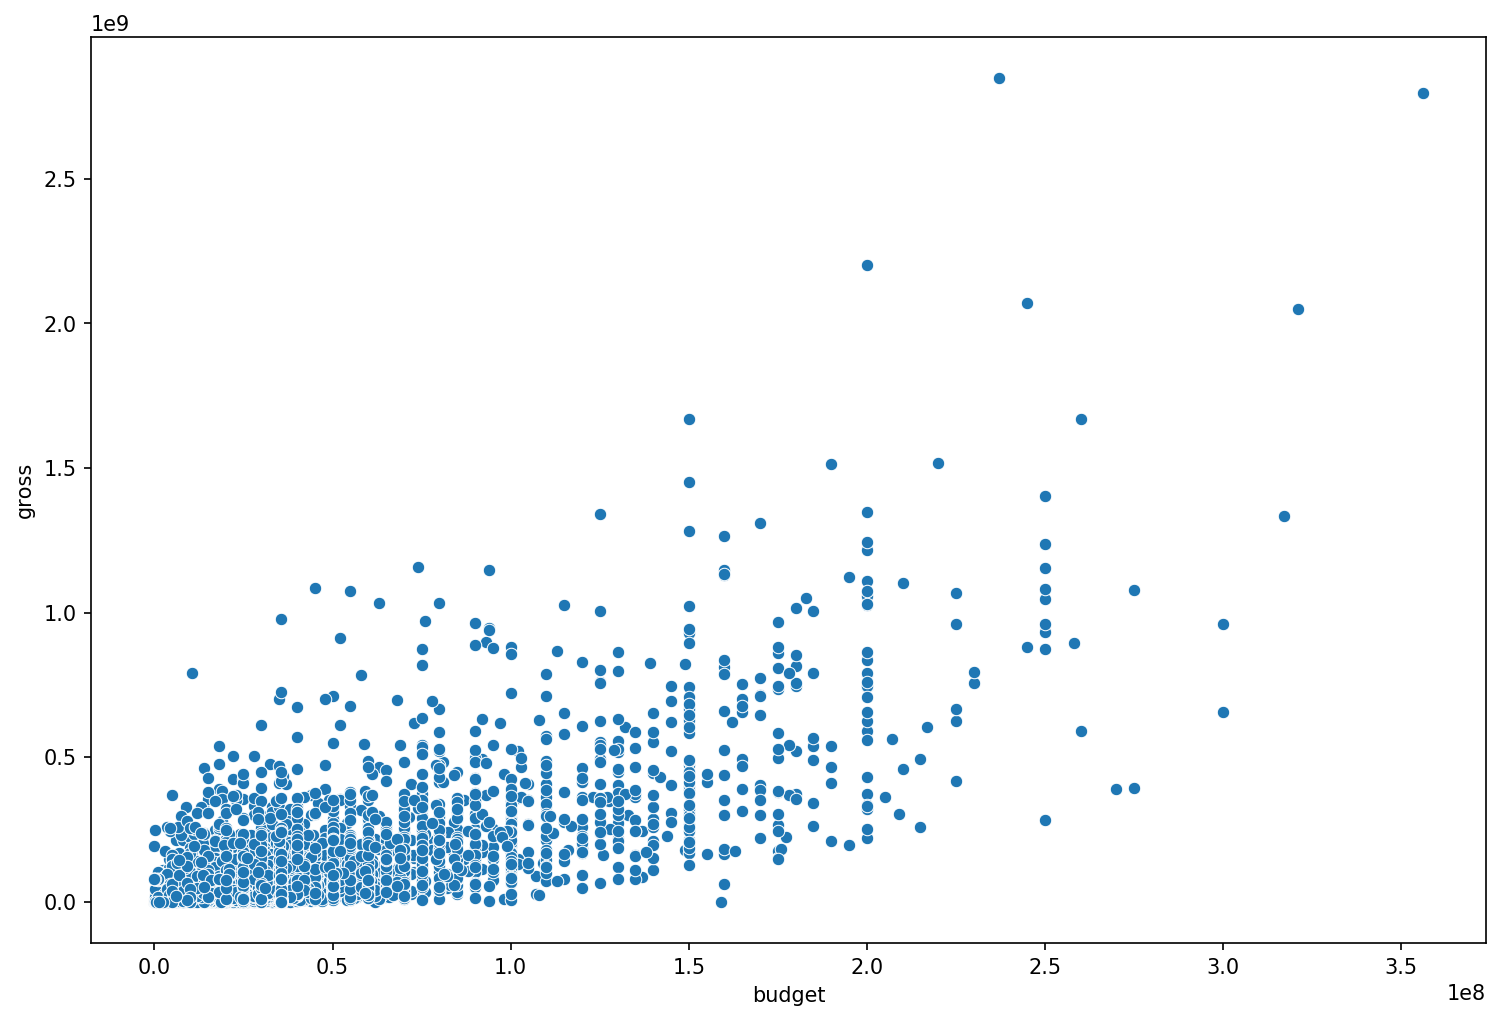

In [47]:
plt.figure(figsize = (12, 8), dpi = 150)
sns.scatterplot(data = df, x = 'budget', y = 'gross');

For better intuition we can use regplot.

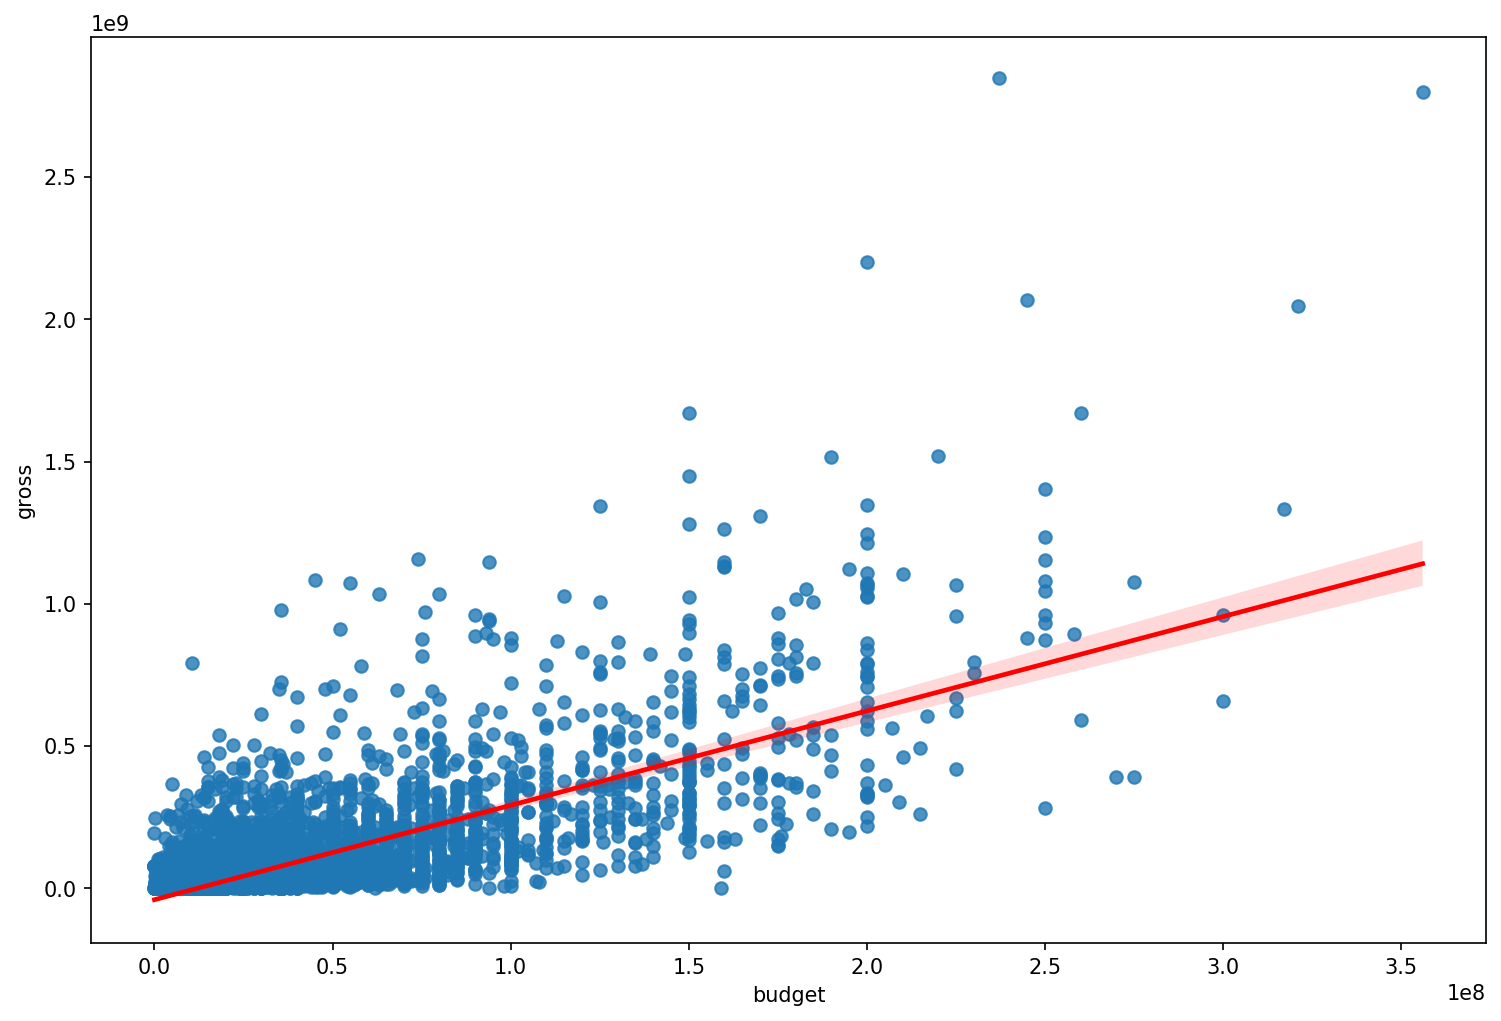

In [50]:
plt.figure(figsize = (12, 8), dpi = 150)
sns.regplot(data = df, x = 'budget', y = 'gross', line_kws={'color':'red'});

As you see, we cannot find a deep intuition between these two parameters.

Then, I want to check year and gross.

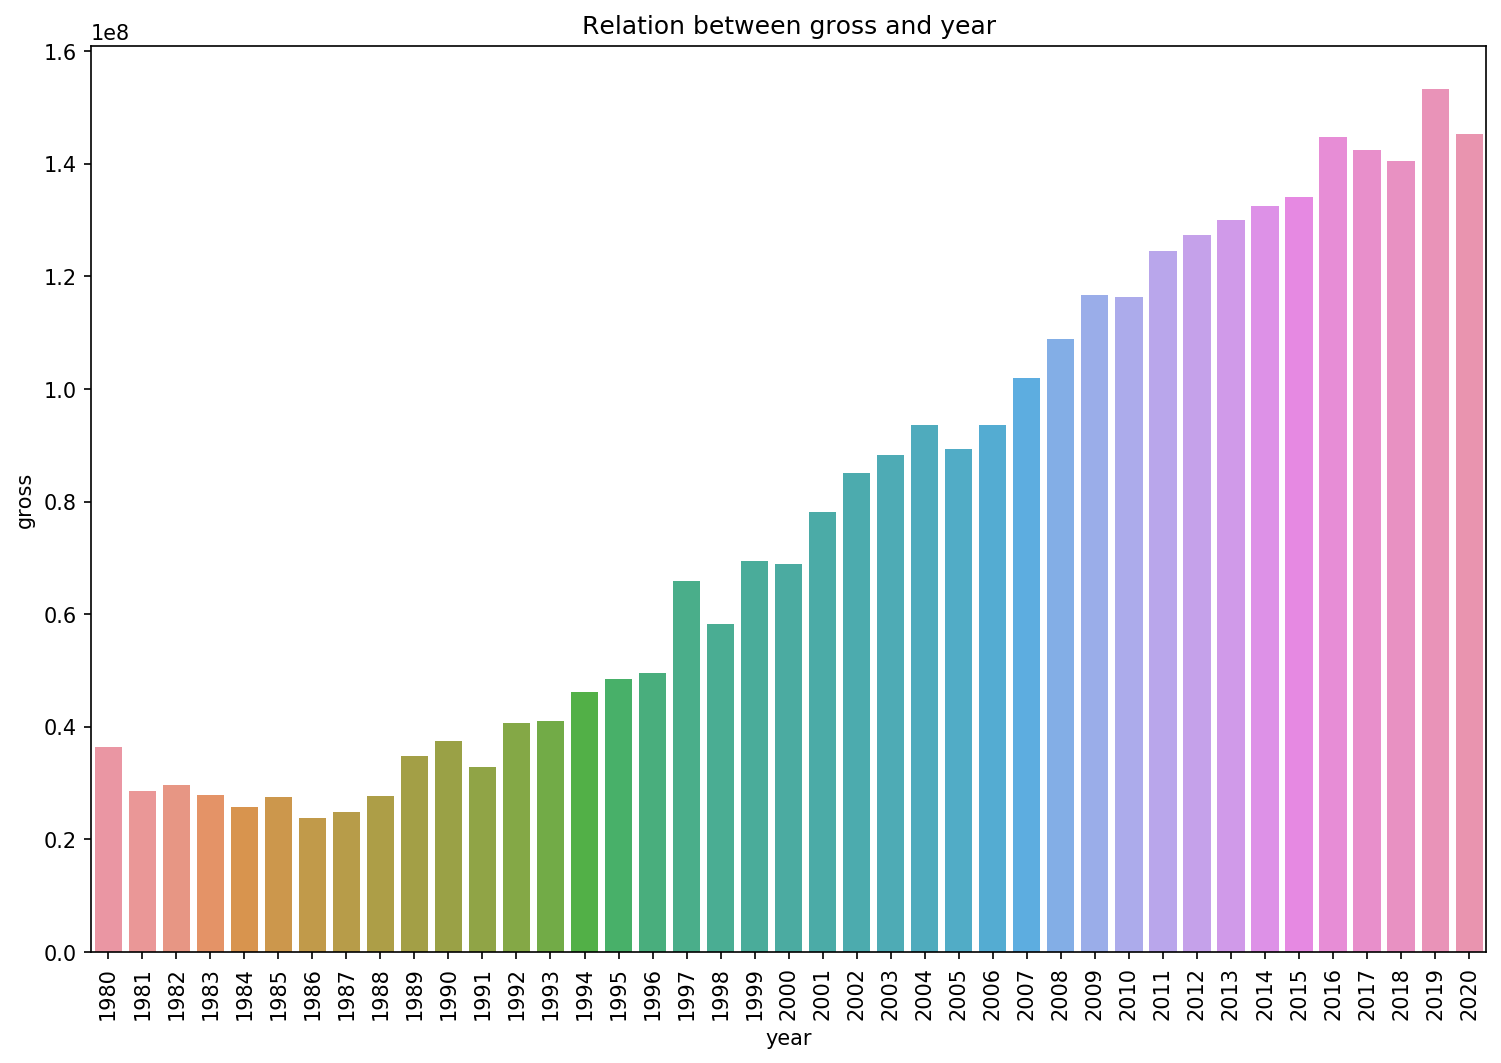

In [61]:
plt.figure(figsize = (12, 8), dpi = 150)
sns.barplot(data = df, x = 'year', y = 'gross', ci = None)
plt.xticks(rotation=90);
plt.title('Relation between gross and year');

It's a clear patter after 1980 we had an increase in gross totally, but in 2020 we had a decrease and it's probably related to Covid qurantine in the world and close the cinema.

Next step: Check the relation between Score and gross.

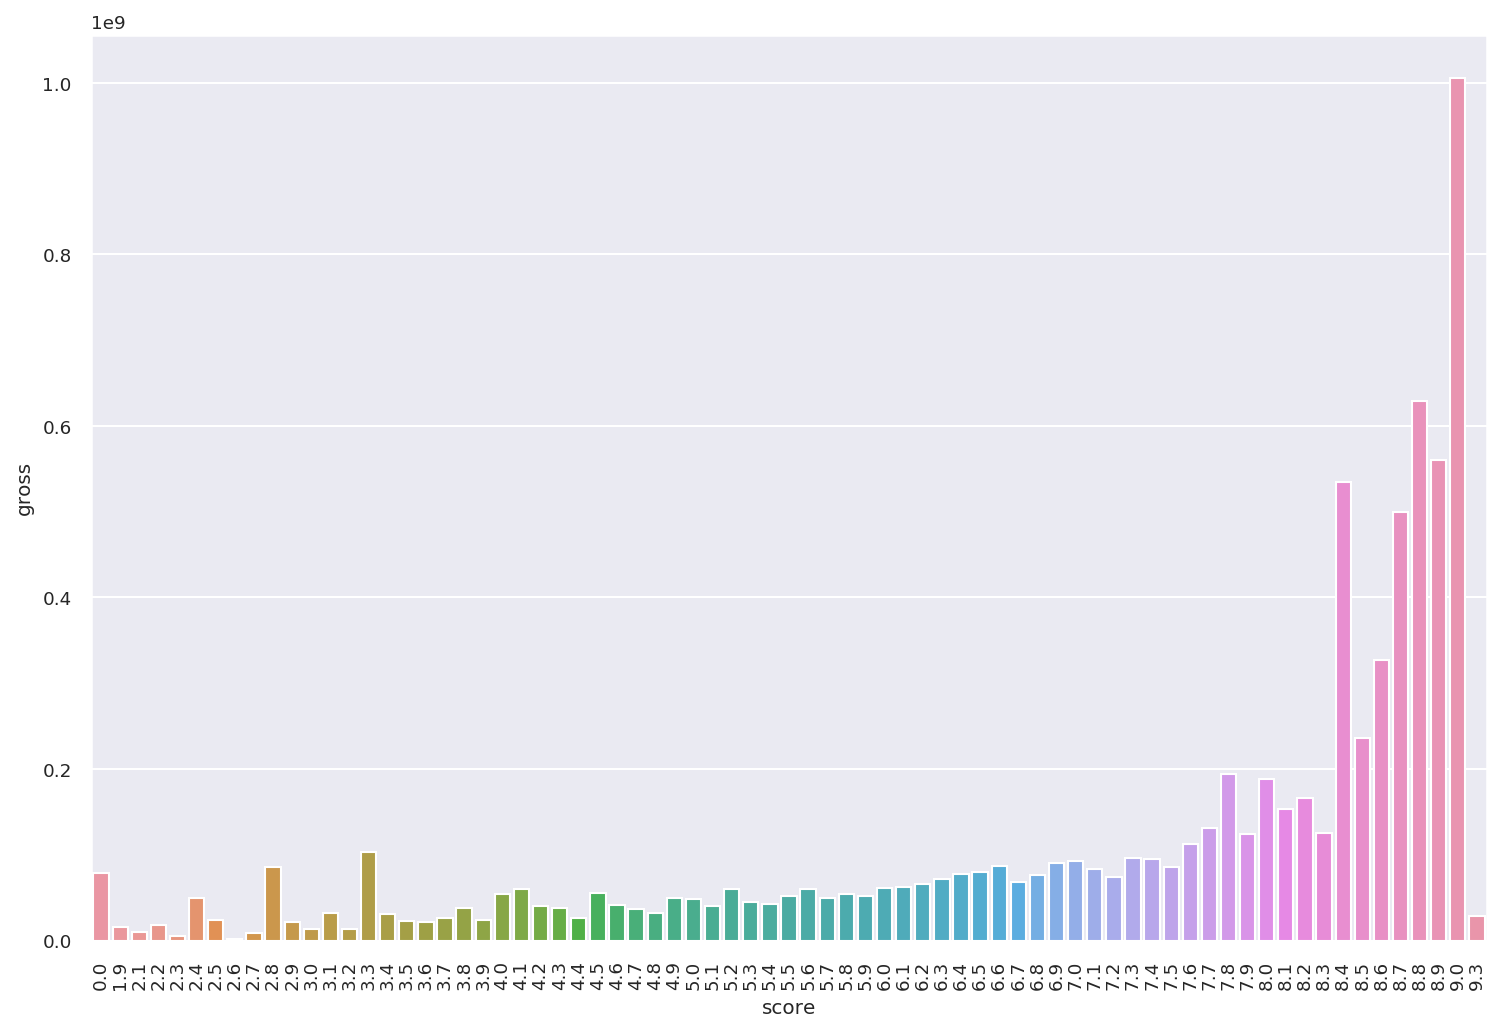

In [81]:
plt.figure(figsize = (12, 8), dpi = 150)
sns.set(font_scale = 0.8)
sns.barplot(data = df, x = 'score', y = 'gross', ci = None);
plt.xticks(rotation=90);

As we see with increase scores we can expect increase in gross, but for 9.3 score we have a decrease. But Why?
so, we check year and score in the next step:


(1980, 2020)

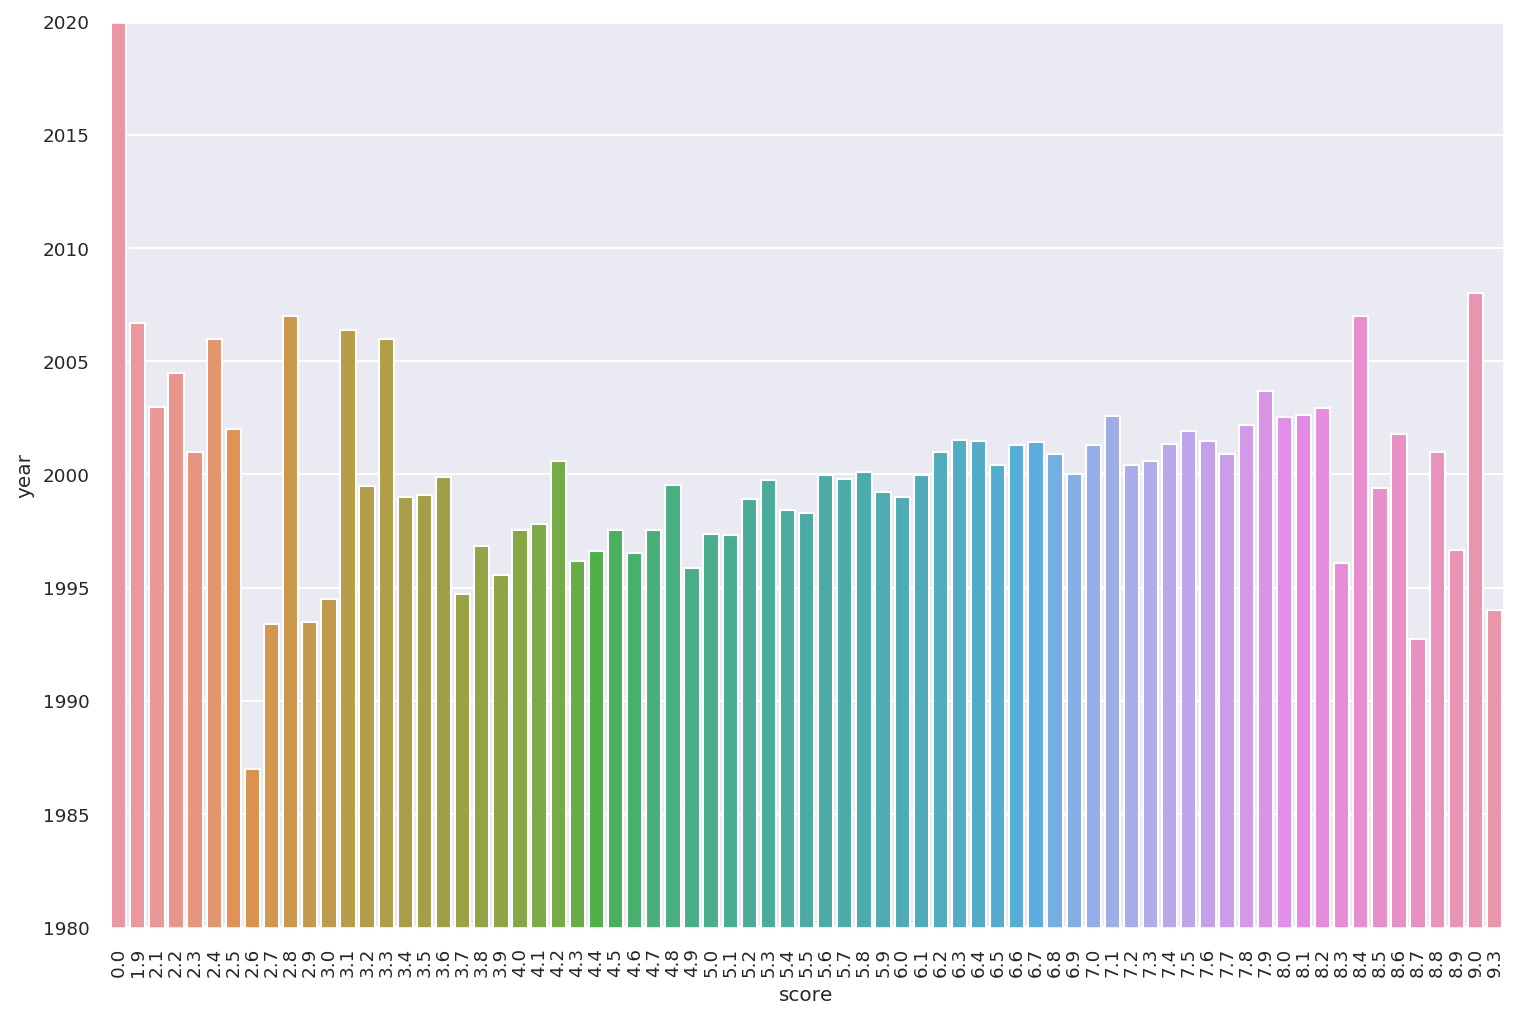

In [88]:
plt.figure(figsize = (12, 8), dpi = 150)
sns.set(font_scale = 0.8)
sns.barplot(data = df, x = 'score', y = 'year', ci = None);
plt.xticks(rotation=90);
plt.ylim(1980,2020)

This chart show us movie with socre 9.3 is belong to before 1995 and based on above charts (gross & year) we had a low amount of gross, then it's clear we had a low amount of gross.

next step, we check the relation between votes and gross.

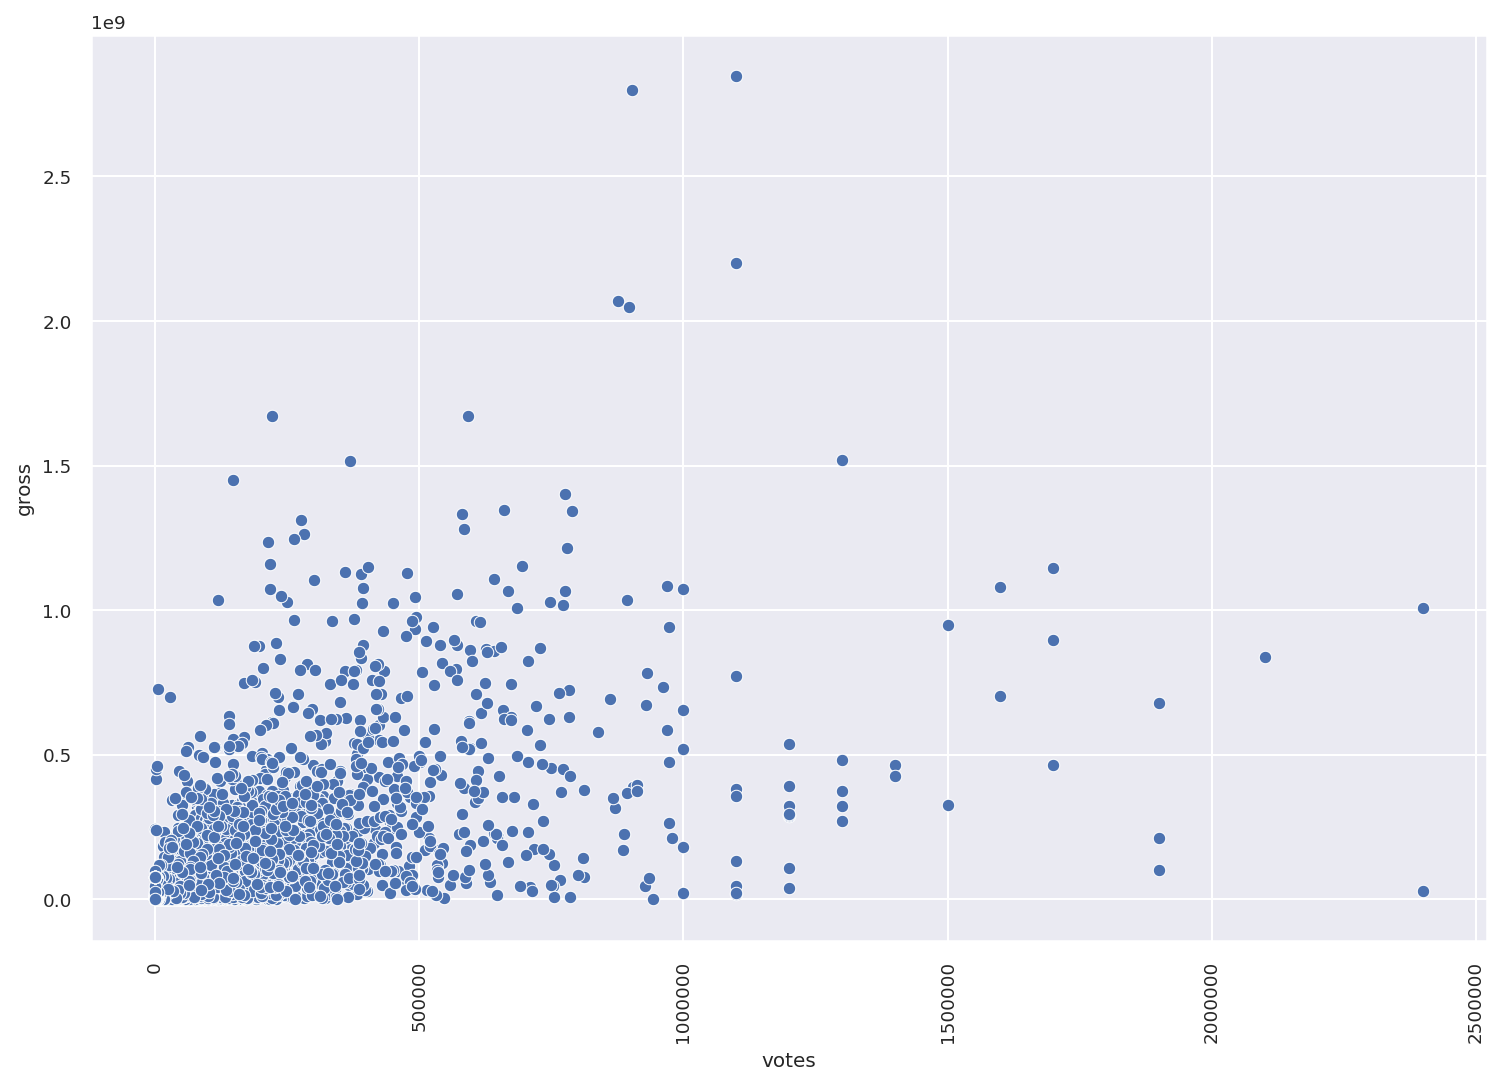

In [90]:
plt.figure(figsize = (12, 8), dpi = 150)
#sns.set(font_scale = 0.8)
sns.scatterplot(data = df, x = 'votes', y = 'gross');
plt.xticks(rotation=90);

We cannot find a deep intutition about this relation between score and .

Next step, check the relation between runtime and gross.

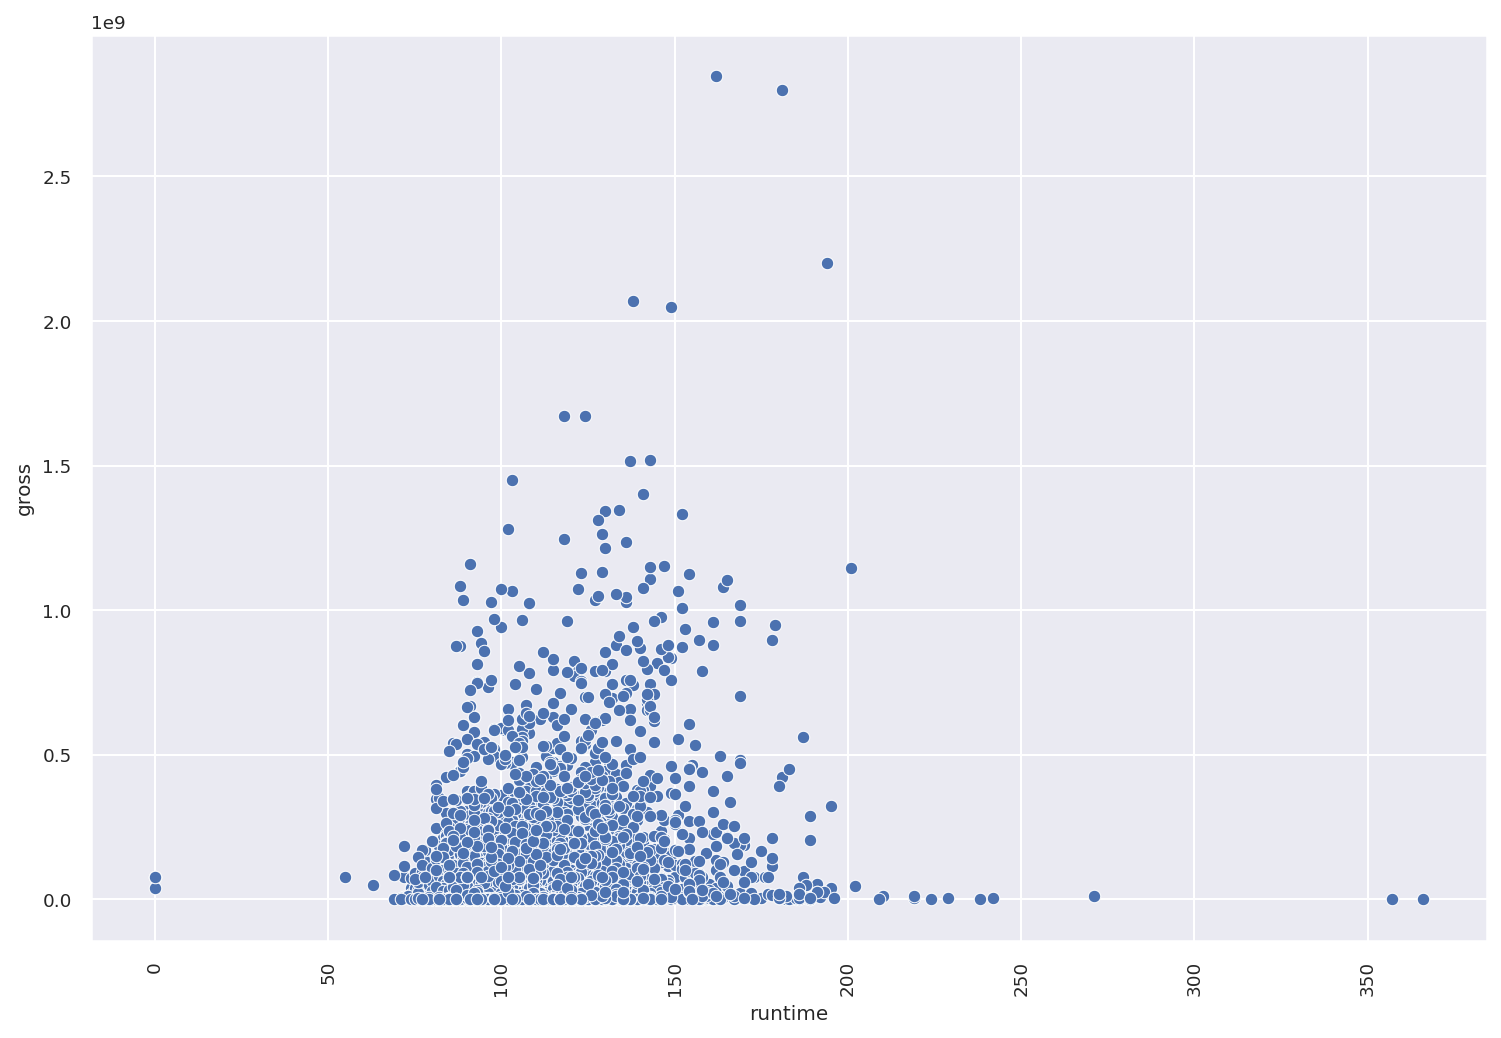

In [93]:
plt.figure(figsize = (12, 8), dpi = 150)
#sns.set(font_scale = 0.8)
sns.scatterplot(data = df, x = 'runtime', y = 'gross');
plt.xticks(rotation=90);

As you see, movies with runtime between 100-150 minute have the most veriaty and the most gross.

Next step: check the Rating and gross.

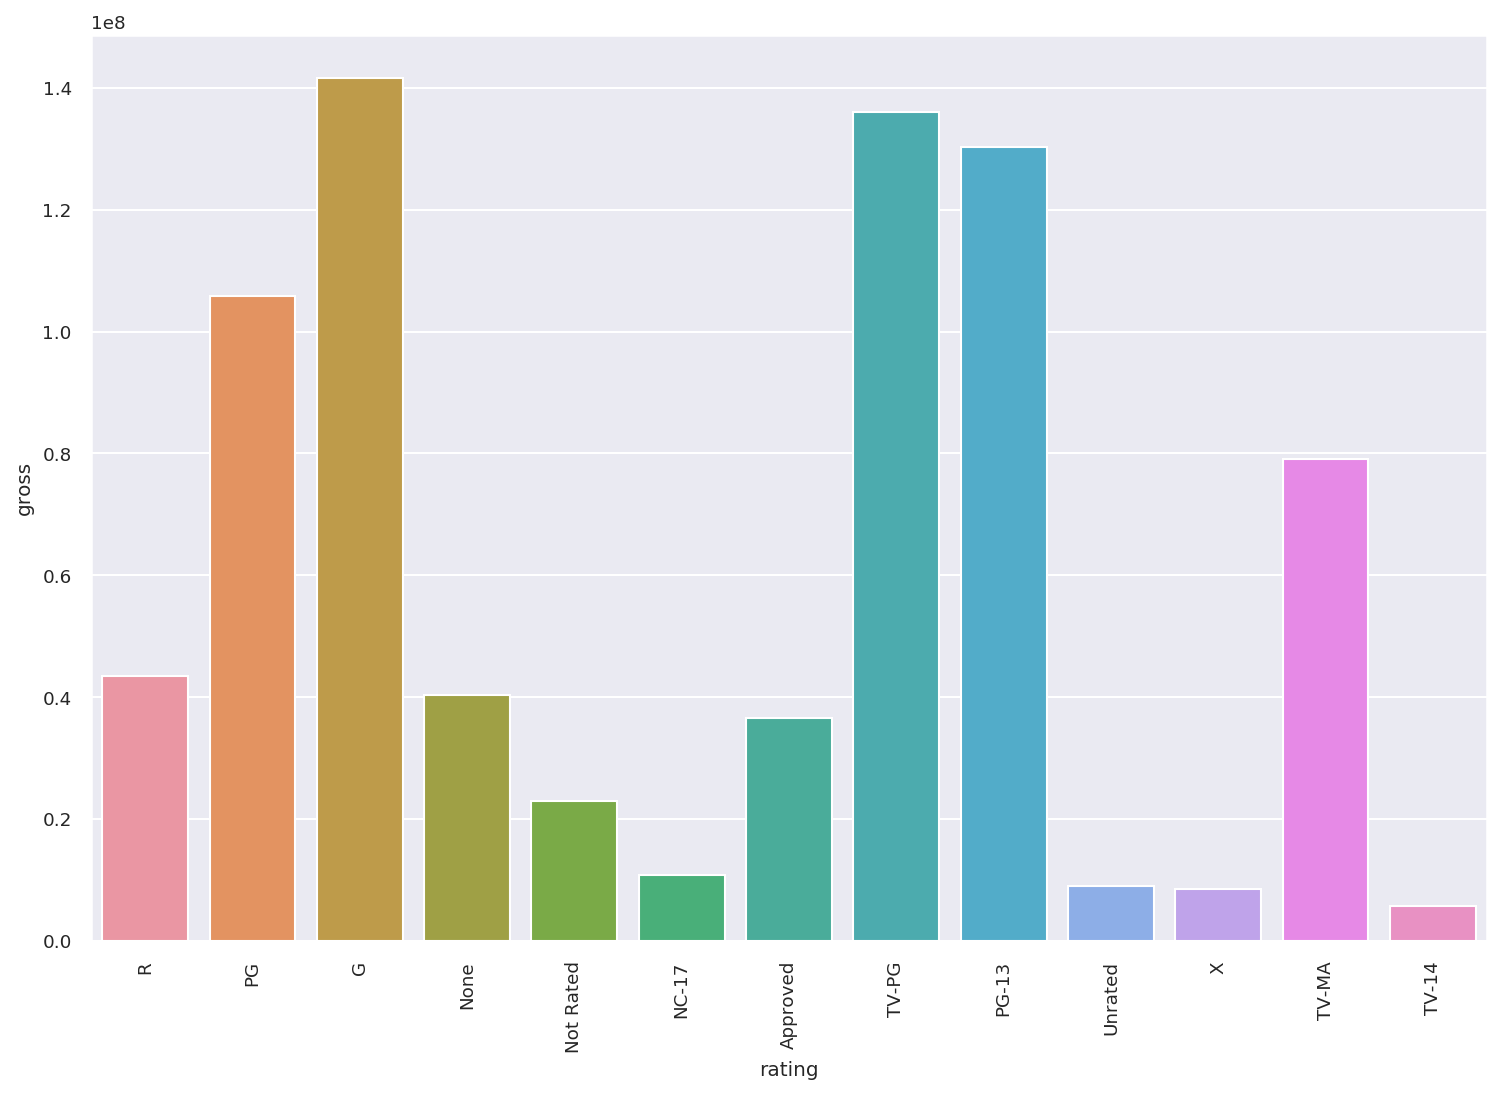

In [95]:
plt.figure(figsize = (12, 8), dpi = 150)
#sns.set(font_scale = 0.8)
sns.barplot(data = df, x = 'rating', y = 'gross', ci = None);
plt.xticks(rotation=90);

As you see, Movies with G, TV-PG, PG-13 and PG are the highest gross.

Next step, Check country:

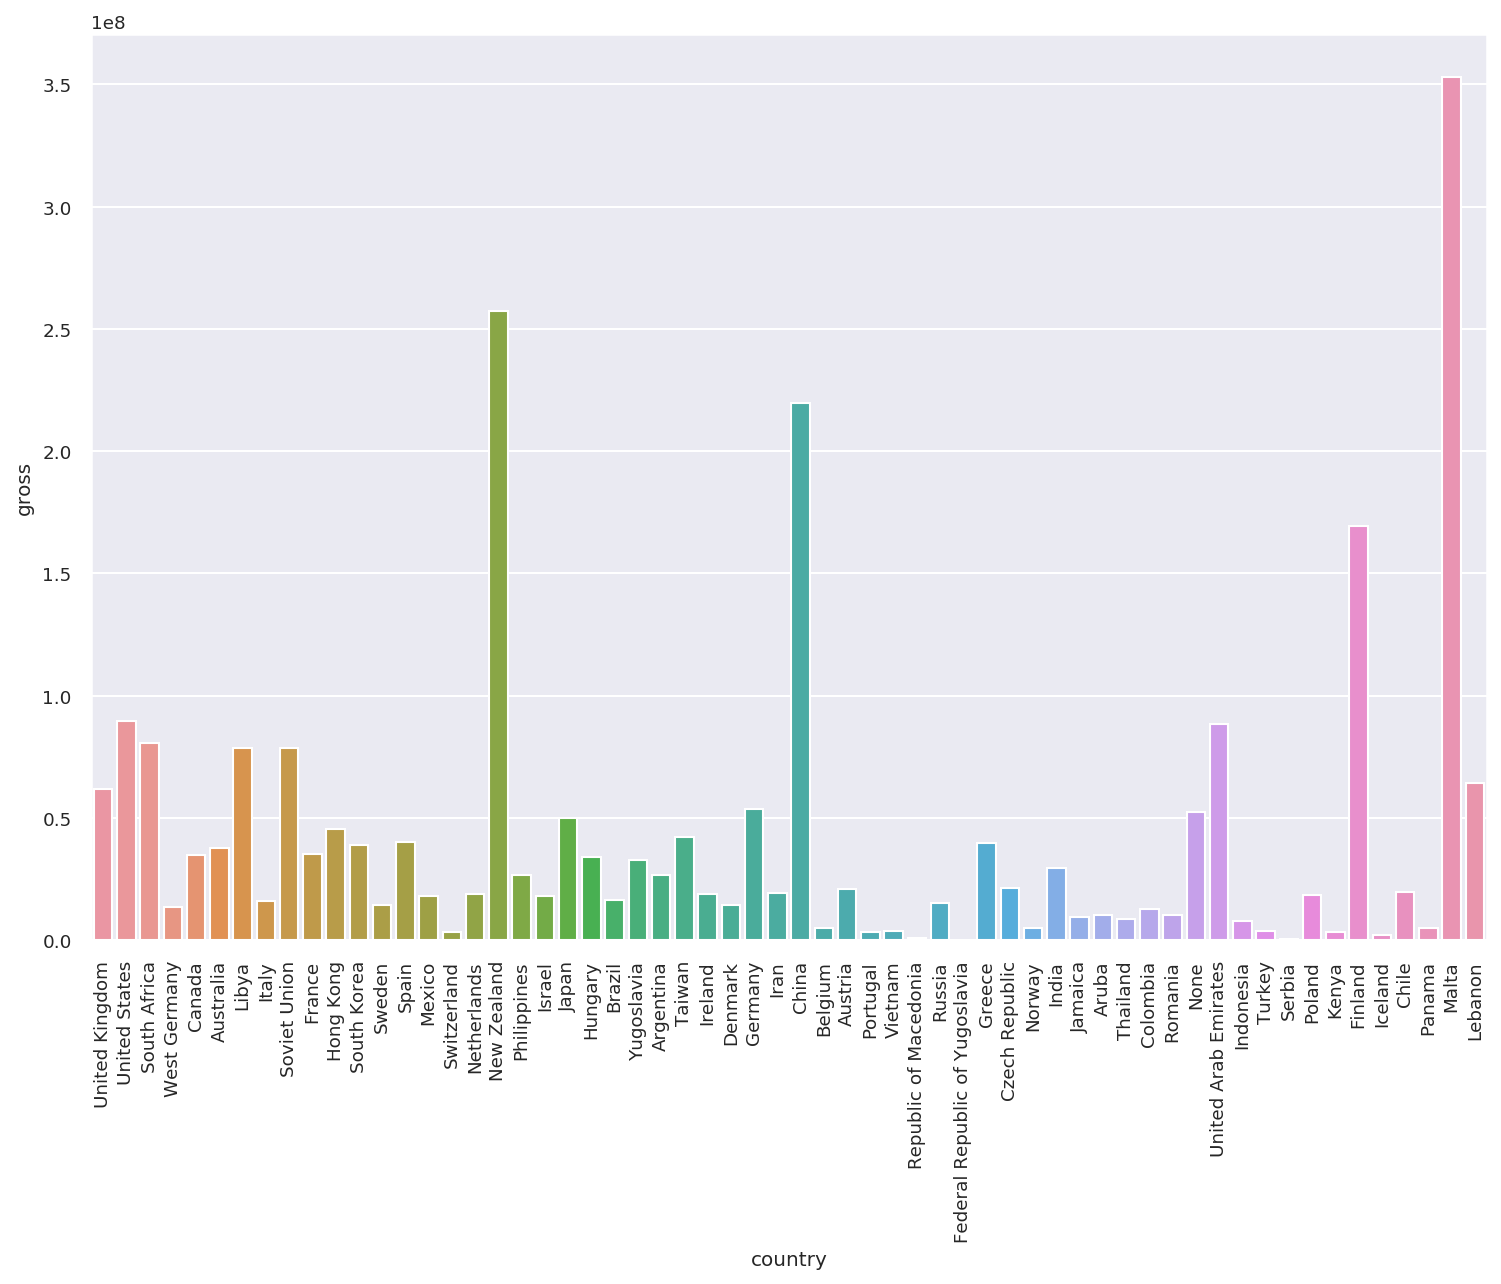

In [96]:
plt.figure(figsize = (12, 8), dpi = 150)
#sns.set(font_scale = 0.8)
sns.barplot(data = df, x = 'country', y = 'gross', ci = None);
plt.xticks(rotation=90);

Finally, check the genere.

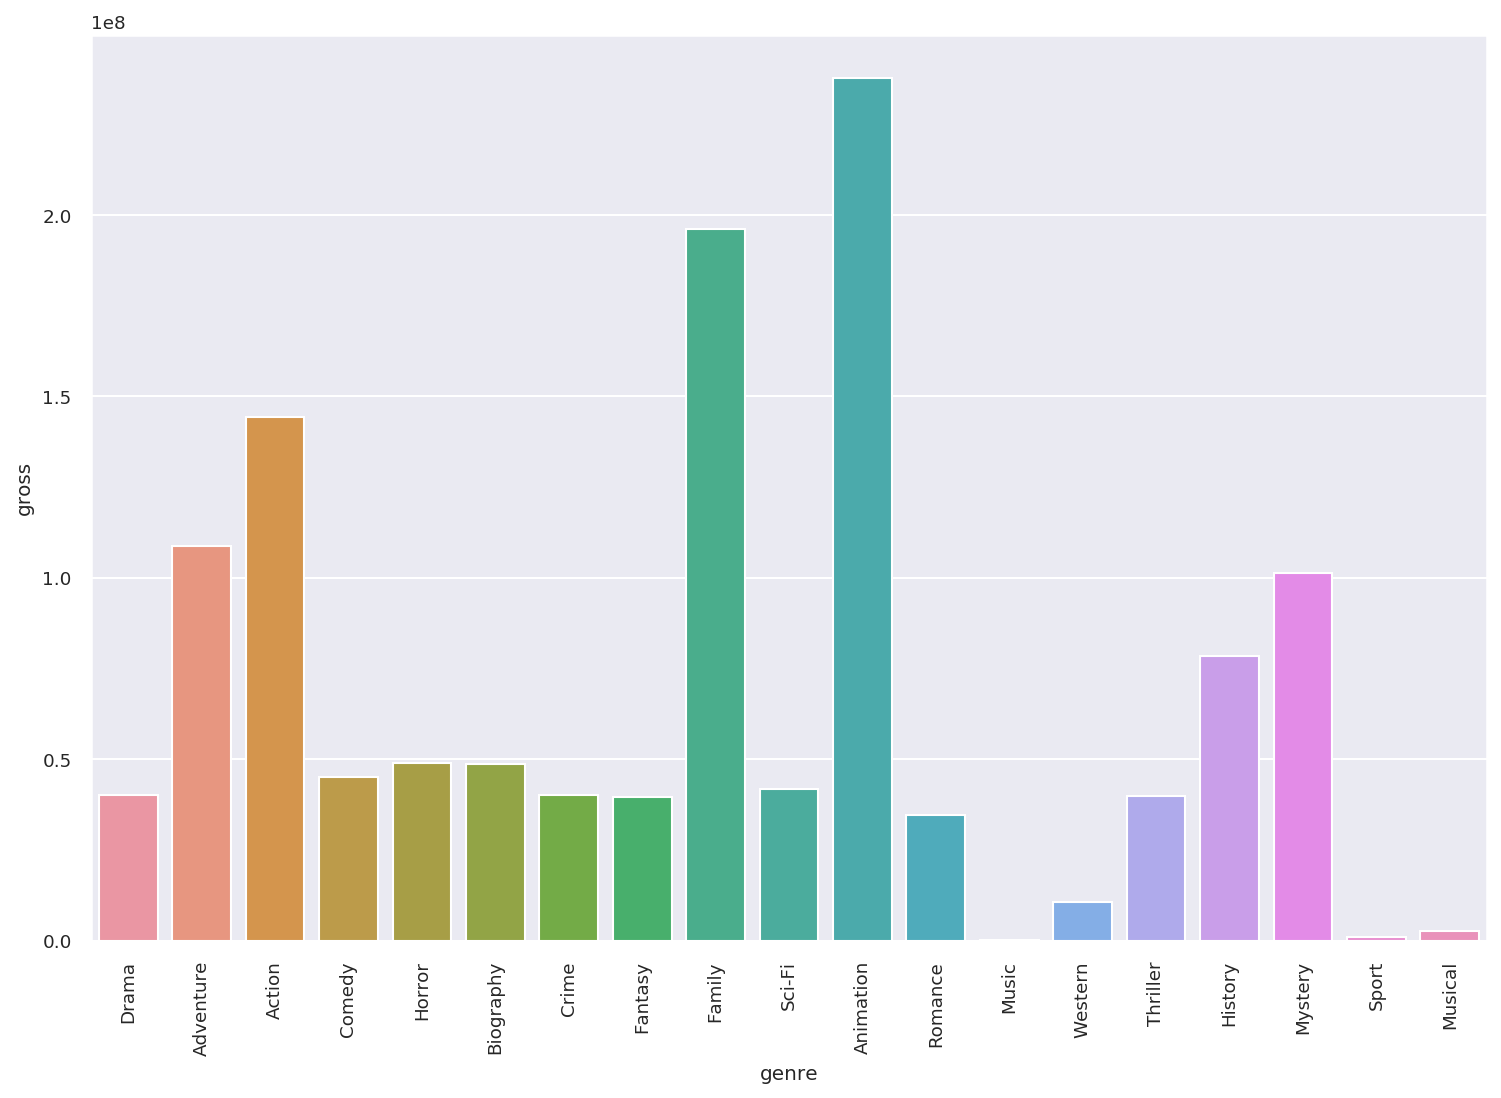

In [97]:
plt.figure(figsize = (12, 8), dpi = 150)
#sns.set(font_scale = 0.8)
sns.barplot(data = df, x = 'genre', y = 'gross', ci = None);
plt.xticks(rotation=90);